# Title Goes Here

### Python Requirements

In [9]:
from sklearn import svm
SVC = svm.SVC()
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
import numpy as np
import os.path
from IPython.display import HTML
from ipywidgets import widgets

## Data generation code

## NOTE: this is referencing a specific notebook !!! I might need to change this in the future to use the right code.

In [2]:
% run Project_hackathon_functions.ipynb

In [3]:
def getBothDataSets(input1,input2,input3,input4):
    # generate points for training
    eventsA = points_gen(200,200,200,200)
    # Convert generated points A to data (t(x))
    data, labels, x = points_to_data(eventsA)
    
    # generate points for testing
    eventsB = points_gen(200,200,200,200)
    # Convert generated points B to data (t(x))
    dataB, labelsB, x = points_to_data(eventsB)
    
    # make a model from training data
    model = comboFunctionA(eventsA)
    # generate predicted labels for B based on model from A
    eventsB_testEvents = makeEventsDict(eventsB)
    test = testUnseenEvents(model,eventsB_testEvents)
    predictionPerformance = getTrueFalseOfPred(test)
    
    # generate input (User) points
    eventsU = points_gen(input1,input2,input3,input4)
    # Convert generated points to data (t(x))
    dataU, labelsU, x = points_to_data(eventsU)
    # Make a prediction based on the existing model
    newLabelsU = predict_from_data(eventsU, model)
    
    figI = data_plot(dataU,labelsU,x,'no')
    figII = data_plot(dataU,labelsU,x,'yes')
    figIII = data_plot(dataU,newLabelsU,x,'yes')
    
    fig = figI.get_figure()
    fig.savefig("output1.png", bbox_inches='tight', pad_inches=0, dpi=300)
    
    fig = figII.get_figure()
    fig.savefig("output2.png", bbox_inches='tight', pad_inches=0, dpi=300)
    
    fig = figIII.get_figure()
    fig.savefig("output3.png", bbox_inches='tight', pad_inches=0, dpi=300)
    return predictionPerformance

{'False': 44, 'PerFalse': 0.055, 'PerTrue': 0.945, 'Total': 800, 'True': 756}

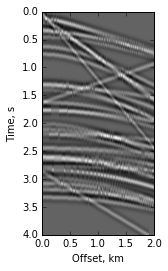

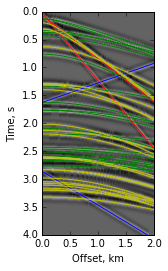

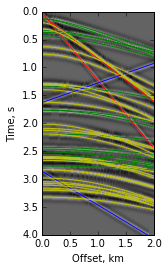

In [4]:
getBothDataSets(2,20,2,20)

### Load HTML/CSS/JavaScript requirements

In [5]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
  }
});

<IPython.core.display.Javascript object>

In [6]:
%%javascript
require.config({
  paths: {
      bootstrapCSS: '//maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css'
  }
});

<IPython.core.display.Javascript object>

In [7]:
%%javascript
require.config({
  paths: {
      bootstrap: '//maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js'
  }
});

<IPython.core.display.Javascript object>

## User Interface

Eventually, this might be moved to a normal HTML/CSS/JS webpage outside of a jupyter notebook that is accessible like any other webpage and either talks to a server to run the models or if want to get really fancy (and more secure) does everything including applying the model in the browser by porting the python code to JavaScript via web assembly. For now though, we're just running it in the jupyter notebook.

#### HTML, CSS, and JavaScript code for User Interface

In [10]:
input_form = """
<style>
 body {
    background-color: lightblue;
}
div#title{
    text-align:center;
    margin-top: 40px;
    margin-bottom: 40px;
    hieght: 150px;
}
div#parameters {
    height: 100px;
    text-align: center;
}
h2#parameters {
    height: 50px; 
}
img{
    padding-left:50px;
}
</style>
<div id="title">
    <h1>Seismic Shotgather Record Colorizer</h1>
</div>
<div id="parameters" style="height:100px;">
    <h2>Parameters</h2>
    <div>
         Reflections: <input type="text" id="var_name" value="10">
         Coherent Noise: <input type="text" id="var_name" value="8"><br>
         <button onclick="set_value()">Generate images & Train Model</button>
         <button onclick="set_value()">Use Model to label right image</button>
    </div>
</div>
<div">
</div>
<div class="col-md-4 marginL">
    <h4>Labeled Data A</h4>
    <p>Came with labels, which are colored.</p>
    <p>Labels used to generate SVM ML model.</p>
    <img src="output.png" alt="gathers" align="middle">
    <div>
        <button onclick="set_value()">Export image used in training</button>
    </div>
</div>
<div class="col-md-4 marginL">
    <h4>Unlabled Data B</h4>
    <p>Labels (colors) not original but found using model</p>
    <p>Model came from example to left</p>
    <img src="output.png" alt="gathers" align="middle">
    <div>
        <button onclick="set_value()">Export image now colorized by SVM model</button>
    </div>
</div>
<div class="col-md-4 marginL">
    <h4>Labled Data B</h4>
    <p>Labels (colors) are original </p>
    <p>from this dataset</p>
    <img src="output.png" alt="gathers" align="middle">
    <div>
        <button onclick="set_value()">Export image with original labels</button>
    </div>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value(){
        var var_name = document.getElementById('var_name').value;
        var var_value = document.getElementById('var_value').value;
        var command = var_name + " = '" + var_value + "'";
        console.log("Executing Command: " + command);
        
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
    }
</script>
"""

HTML(input_form + javascript)